<a href="https://colab.research.google.com/github/adkprakash/sentimental_analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
from nltk.corpus import stopwords

In [3]:
from google.colab import drive

In [4]:
# Mount your Google Drive (authorization required)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Path to your CSV file in Google Drive
data_path='drive/My Drive/Dataset'

In [6]:
# Read the CSV file using pandas
data = pd.read_csv(data_path+'/netflix_reviews.csv')

In [7]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d123acad-4c26-41c2-97b0-592f46758853,Nikshia Bhaiwa,This is amazing app,5,0,8.114.0 build 19 50680,2024-05-18 23:04:55,8.114.0 build 19 50680
1,3370bed7-4d52-4e14-b9b8-0282138b708e,Pilot Seleam,"Unsubscribing ! , now i cant open it on my oth...",1,0,8.114.0 build 19 50680,2024-05-18 22:41:23,8.114.0 build 19 50680
2,87bc75a8-81b9-4220-8843-05d0d58f154e,nomthandazo patience,I've been trying to install this app it doesn'...,1,0,8.101.1 build 7 50601,2024-05-18 22:37:34,8.101.1 build 7 50601
3,2cb4ce60-ba5a-4a8b-b878-3df7e41d1b02,Eseme Kelly,Great App 🔥,5,0,8.108.0 build 2 50642,2024-05-18 22:33:34,8.108.0 build 2 50642
4,9ebc48ff-a622-45e8-a3b3-881f612fd016,Eitan Craft24,No me dejaba ver nada porque no estaba en mi casa,1,0,8.114.0 build 19 50680,2024-05-18 21:59:12,8.114.0 build 19 50680


In [8]:
# Dropping unwanted column by name
drop_column=['reviewId','userName','reviewCreatedVersion','at','appVersion']
data = data.drop(drop_column, axis=1)

In [9]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109211 entries, 0 to 109210
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        109211 non-null  object
 1   score          109211 non-null  int64 
 2   thumbsUpCount  109211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [11]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

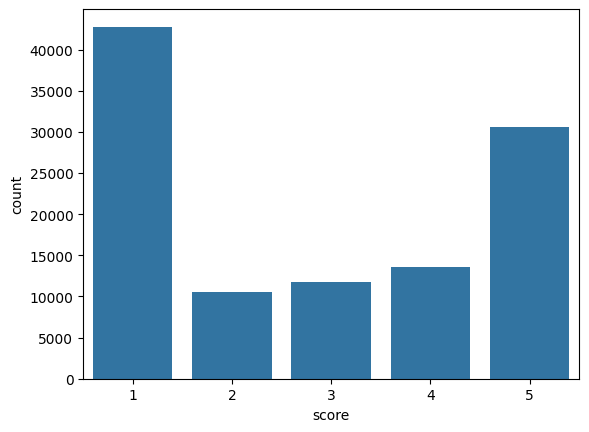

In [12]:
sns.countplot(x='score',data=data)

In [13]:
# Count unique values
num_unique_values = data['thumbsUpCount'].nunique()

# Print the result
print(f"Number of unique values in 'thumbsUpCount': {num_unique_values}")

Number of unique values in 'thumbsUpCount': 899


In [14]:
data['thumbsUpCount'].describe()

count    109211.000000
mean         10.798473
std         102.097338
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [15]:
data['thumbsUpCount'].mean()

10.79847268132331

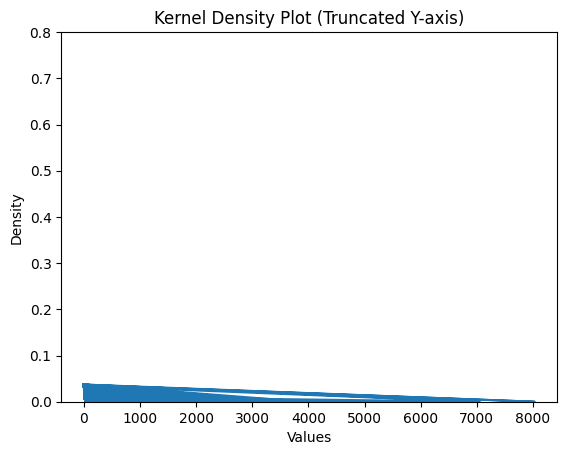

In [16]:
from scipy.stats import gaussian_kde
# Defining a function to calculate the kernel density
def estimate_density(x):
    kde_obj = gaussian_kde(x)
    density = kde_obj(x)
    return density

# Calculate the density
density = estimate_density(data['thumbsUpCount'])

# Set a maximum y-axis value (adjust as needed)
max_density = 0.8  # You can experiment with different values

# Plot the kernel density estimate
plt.plot(data['thumbsUpCount'], density)

# Truncate the y-axis
plt.ylim(0, max_density)  # Set the y-axis limits

# Add labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Plot (Truncated Y-axis)")

plt.show()

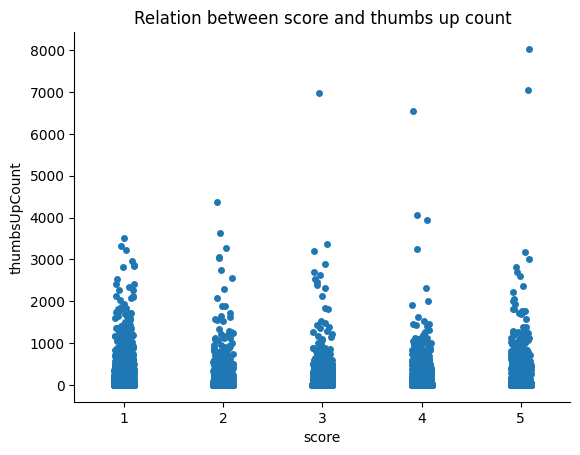

In [17]:
# Create a strip plot
sns.stripplot(
    x = "score",
    y = "thumbsUpCount",
    data=data
)

# Customize the plot
sns.despine()  # Remove grid lines for cleaner visuals
plt.title("Relation between score and thumbs up count")  # Add a title

# Display the plot
plt.show()


In [18]:
# Setting a threshold score to separate positive and negative reviews
threshold = 3

def convert_to_review(score):
  if score < threshold:
    return "negative"
  else:
    return "positive"

# Applying the conversion function to the "score" column
data['score'] = data['score'].apply(convert_to_review)

In [19]:
data['score'].value_counts()

score
positive    55909
negative    53302
Name: count, dtype: int64

In [20]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0
2,I've been trying to install this app it doesn'...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


In [21]:
# importing MinMax Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Select the column to scale
column_to_scale = 'thumbsUpCount'

# Create a MinMaxScaler object (optional: specify the desired range)
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize to range 0 to 1

# Separate the data for the column to scale
data_to_scale = data[[column_to_scale]]

# Apply MinMaxScaler transformation
scaled_data = scaler.fit_transform(data_to_scale)

# Optional: Add the scaled data back to the DataFrame (create a new column)
data['new' + 'thumbsUpCount'] = scaled_data.squeeze()  # Squeeze to remove extra dimension

In [22]:
data.head()

,content,score,thumbsUpCount,newthumbsUpCount
0,This is amazing app,positive,0,0.0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0,0.0
2,I've been trying to install this app it doesn'...,negative,0,0.0
3,Great App 🔥,positive,0,0.0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0,0.0


In [23]:
data = data.drop('thumbsUpCount', axis=1)

In [24]:
data.head()

,content,score,newthumbsUpCount
0,This is amazing app,positive,0.0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0.0
2,I've been trying to install this app it doesn'...,negative,0.0
3,Great App 🔥,positive,0.0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0.0


<Axes: xlabel='newthumbsUpCount', ylabel='Density'>

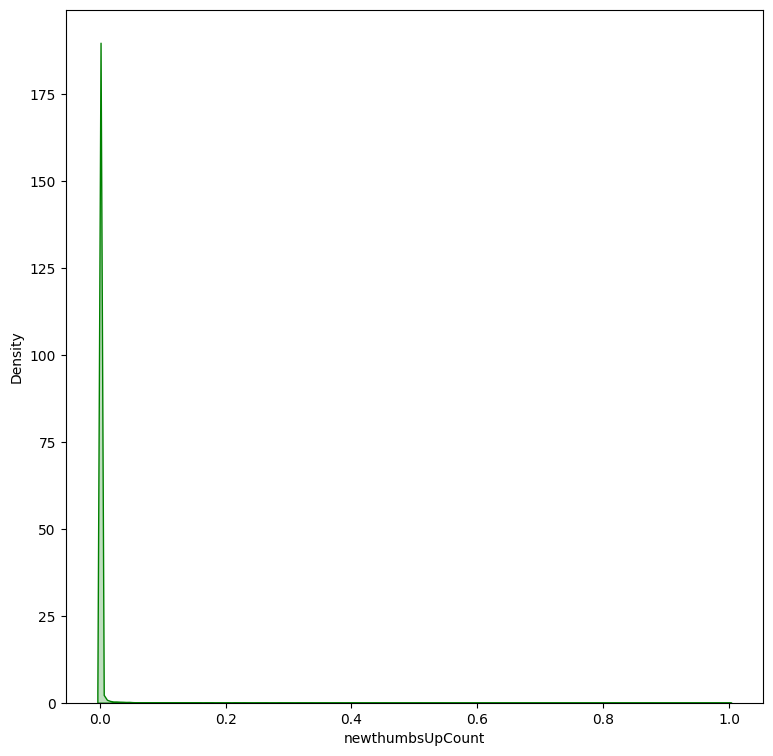

In [25]:
plt.figure(figsize=(9,9))
sns.kdeplot(data['newthumbsUpCount'], color='g', fill=True)